In [29]:
import uproot

import pandas as pd
import ultraplot as plot

import matplotlib as mpl
import matplotlib.pyplot as plt

import mplhep as hep

import numpy as np

plot.rc['figure.facecolor'] = 'none'
plot.rc['savefig.facecolor'] = 'none'
plot.rc['legend.frameon'] = False
plot.rc['axes.autolimit_mode'] = 'data'

plot.rc['cmap.levels'] = 4
file = uproot.open('reco1muNp_checks.root')

cheated_POT = file['cheated/POT'].values()
non_cheated_POT = file['non_cheated/POT'].values()


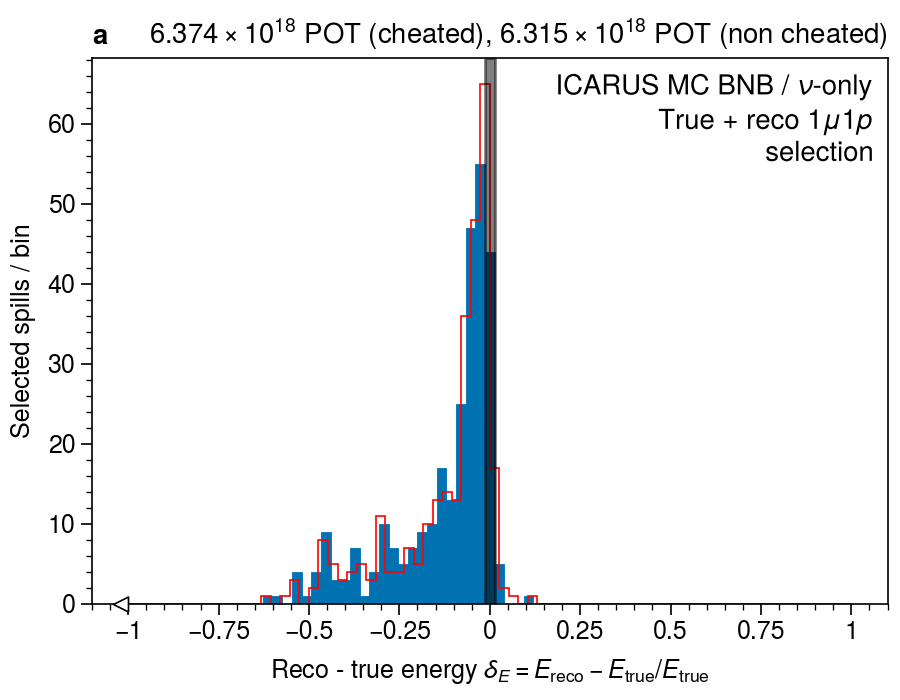

In [30]:
cheated = file['cheated/cheated'].arrays(library='ak')
non_cheated = file['non_cheated/non_cheated'].arrays(library='ak')

dE_bins=np.linspace(-1., 1., 76)
# dE_bins=np.concatenate([dE_bins, np.array([1.])])

fig, ax = plot.subplots(
    width=4.5, height=3.5, ncols=1, nrows=1, 
    xlabel=r'Reco energy $E_\text{reco}^\nu$', ylabel=f'Selected spills / bin',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue + reco $1\\mu 1p$\nselection'# , yscale='log',
)

ax.hist(non_cheated.delta_E.to_numpy(), bins=dE_bins, label='Mattia selection')
hep.histplot(uproot.open('test.root')['hRatioTrueSlice'], yerr=False, color='r')
ax.format(xlabel=r'Reco - true energy $\delta_E = E_\text{reco}-E_\text{true}/E_\text{true}$')

xmin = np.diff(dE_bins)[0]
ax.axvspan(-xmin/2, +xmin/2, color='k', alpha=0.5, lw=1)



In [27]:
uproot.open('test.root').keys()

['hRatioTrue;1', 'hRatioTrueSlice;1']